In [1]:
import functions as fn
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from PIL import Image
from sklearn.preprocessing import normalize
import math
from scipy.stats import norm

In [2]:
stimulus_duration = 1000
sigma_i = 0.25
sigma_s = 0.25
tau = 200 #ms
dt = tau/40 #ms
mu = 0.2
stimulus_duration = 1000
frames_duration = dt
alfa = 1

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


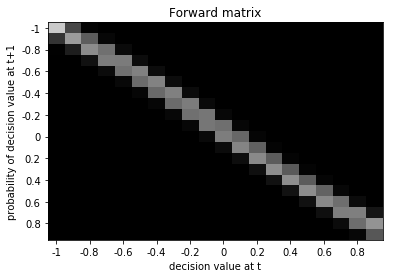

In [3]:
# The boundary for the forward matrix (since the atractors are approximately at 0.75 and -0.65)
L = 1
# Steps of 0.1 will be used
forward_matrix = np.zeros((int(10*(L+L)),int(10*(L+L))))

y = 0
for x in np.arange(-L,L,0.1): 

    # The mean of the distribution will be computed
    mean = x-(dt/tau)*(-mu-alfa*x*2+4*x**3)
    # The standard deviation of the distribution will be computed
    stdr_dev = np.sqrt(dt/tau)*np.sqrt(sigma_i**2+sigma_s**2)
    
    limits = np.linspace(-L,L,21)
    cumulative = norm.cdf(limits, loc = mean, scale = stdr_dev)
    d = np.diff(cumulative)
    counter = 0
    for element in d:
        forward_matrix[counter][y]= element
        counter += 1
    if y <10:
        infinity = 1-sum(d)
        forward_matrix[0][y]+=infinity
    if y >= 10:
        infinity = 1-sum(d)
        forward_matrix[19][y]+= infinity
    y += 1 

# Plotting the forward matrix
plt.figure()
im = Image.fromarray(forward_matrix*256)

plt.title ("Forward matrix")
plt.xlabel("decision value at t")
plt.ylabel("probability of decision value at t+1")
positions = [0,2,4,6,8,10,12,14,16,18,20]
labels = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
plt.xticks(positions, labels)
plt.yticks(positions,labels)
plt.imshow(im,aspect = "auto")
print(forward_matrix.sum(axis=0))

200


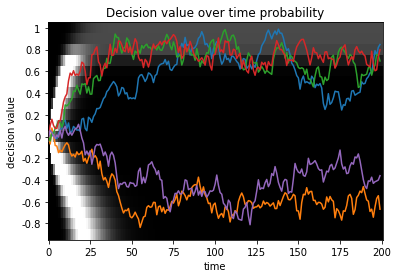

In [4]:
# The vector with the first decision value will be created:
vector = np.zeros((1,20))[0]
vector[10] = 1

# In this list the different vectors will be stored
final = [vector]
# Each vector will be multiplied by the forward matrix
print(int(stimulus_duration/frames_duration))
for i in range(int(stimulus_duration/frames_duration)):
    vector = forward_matrix.dot(vector)
    final.append(vector)
final = np.asarray(final)
final = final.transpose()
#DW(x_value, dt, tau, mu, sigma_i,  sigma_s, alfa, n_trials, stimulus_duration, frames_duration)
trials, stimulus_list =  fn.DW(0, dt, tau, mu, sigma_i,  sigma_s, alfa, 5, stimulus_duration, frames_duration)

im = Image.fromarray(normalize(final)*1000)
fig, ax = plt.subplots(1,1)
img = ax.imshow(im,aspect = "auto")
for trial in trials:
    trial.pop()
    trial_new = []
    for i in trial:
        trial_new.append((i-L)*(-10))
    plt.plot(np.arange(0,len(trial_new),1),trial_new)
positions = [0,2,4,6,8,10,12,14,16,18]
labels = [1,0.8,0.6,0.4,0.2,0,-0.2,-0.4,-0.6,-0.8]
plt.yticks(positions, labels)
plt.title("Decision value over time probability")
plt.xlabel("time")
plt.ylabel("decision value")
positions = [200/8*n for n in range(9)]
labels = [1000/8*n for n in range(9)]
#plt.xticks(positions, labels)

In [5]:
# Calcular la mitjana:

# Mitjana simulacions
x_vector = []
for i in range(100):
    x = 0
    xi_i = np.random.randn(1)
    xi_s = np.random.randn(1)
    x = x - (dt/tau)*(-mu-2*alfa*x+4*x**3)+np.sqrt(dt/tau)*(sigma_i*xi_i+sigma_s*xi_s)
    x_vector.append(x)

print("mean = ", sum(x_vector)/len(x_vector))

# Mitjana teòrica
x = 0
print("mean = ", x-(dt/tau)*(-mu-alfa*x*2+4*x**3))


mean =  [0.0128441]
mean =  0.005000000000000001
